# Imports

## Data Management

In [1]:
import datetime
import numpy as np
import pandas as pd

## Analysis and Cleaning

In [2]:
import string
import re

from gensim.parsing.preprocessing import preprocess_string, strip_tags, strip_punctuation, \
                                        strip_multiple_whitespaces, strip_numeric, \
                                        remove_stopwords, strip_short 
from gensim.models import Word2Vec

## Learning

In [3]:
from sklearn import cluster
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

## Visualization

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Validation and Testing

In [5]:
from glob import glob

# Data Analysis & Cleanup

In [6]:
fake = pd.read_csv('../data/Fake.csv')
true = pd.read_csv('../data/True.csv')
print('False Sample')
display(fake.sample(10))
print('\n\n\n\n')
print('True Sample')
display(true.sample(10))

False Sample


,title,text,subject,date
522,Donald Trump Never Met A Disaster He Couldn’t...,Back when conservative politics were actually ...,News,"August 21, 2017"
19678,BREAKING! Wikileaks’ Julian Assange Explains W...,Julian Assange met with John Pilger of Dartmou...,left-news,"Nov 4, 2016"
7167,Donald Trump Is Staring Down A Criminal Inves...,The Donald isn t having a very good week at al...,News,"April 1, 2016"
22630,Trump Faces Off With CNN’s Jake Tapper Over Ev...,21st Century Wire says After last Friday night...,US_News,"March 14, 2016"
7403,Trump’s Campaign Manager Caught On Tape Insti...,Donald Trump has repeatedly defended his blata...,News,"March 19, 2016"
8941,Donald Trump Cracks Jokes After His Supporter...,"Here we go, again.Another supporter of Donald ...",News,"January 6, 2016"
7601,"Yes, You’re Gonna Want To See Mitt Romney Rea...",It s pretty much common knowledge that all Mit...,News,"March 9, 2016"
1242,Several Bars Will Be Opening Early Thursday F...,If you are looking for somewhere to drink whil...,News,"June 7, 2017"
4197,Ben Carson Just Totally Lost His Sh*t On MSNB...,When Ben Carson was asked about the multiple w...,News,"October 14, 2016"
9662,CA FIRE UPDATE: Jesus Fabian Gonzalez Arrested...,"Yesterday, a man who is likely an illegal alie...",politics,"Oct 18, 2017"







True Sample


,title,text,subject,date
6065,Crowd controversy: The making of an Inaugurati...,(This January 23 story corrects time of 2009 ...,politicsNews,"January 23, 2017"
3355,Watergate 'pales' compared with Trump-Russia: ...,SYDNEY (Reuters) - The Watergate scandal pales...,politicsNews,"June 7, 2017"
8657,Obama signs into law opioid addiction bill to ...,WASHINGTON (Reuters) - President Barack Obama ...,politicsNews,"July 22, 2016"
9290,Clinton attacks Trump's foreign policy as a th...,WASHINGTON (Reuters) - U.S. Democratic preside...,politicsNews,"June 2, 2016"
20106,Turkey says expects humanitarian aid can be de...,ANKARA (Reuters) - Turkey said on Thursday it ...,worldnews,"September 14, 2017"
20386,Russia sanctions should be phased out if Ukrai...,BERLIN (Reuters) - European sanctions imposed ...,worldnews,"September 11, 2017"
363,U.S. embassy to Russia to resume some visa ser...,MOSCOW (Reuters) - The U.S. Embassy to Russia ...,politicsNews,"December 4, 2017"
2912,Trump administration defends interpretation of...,NEW YORK (Reuters) - The administration of U.S...,politicsNews,"July 4, 2017"
13886,Fire in hotel on Georgia's Black Sea coast kil...,TBILISI (Reuters) - A fire in a hotel in Georg...,worldnews,"November 25, 2017"
20028,Western powers press Iraq Kurd leaders to shel...,"ERBIL/KIRKUK, Iraq (Reuters) - The United Stat...",worldnews,"September 14, 2017"


## Getting rid of unwanted strings

In [7]:
cleansed_data = []
for data in true.text:
    if "@realDonaldTrump : - " in data:
        cleansed_data.append(data.split("@realDonaldTrump : - ")[1])
    elif "(Reuters) -" in data:
        cleansed_data.append(data.split("(Reuters) - ")[1])
    else:
        cleansed_data.append(data)

true["text"] = cleansed_data
display(true.head(10))

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",The head of a conservative Republican faction ...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,Transgender people will be allowed for the fir...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,The special counsel investigation of links bet...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,Trump campaign adviser George Papadopoulos tol...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,President Donald Trump called on the U.S. Post...,politicsNews,"December 29, 2017"
5,"White House, Congress prepare for talks on spe...",The White House said on Friday it was set to k...,politicsNews,"December 29, 2017"
6,"Trump says Russia probe will be fair, but time...",President Donald Trump said on Thursday he bel...,politicsNews,"December 29, 2017"
7,Factbox: Trump on Twitter (Dec 29) - Approval ...,While the Fake News loves to talk about my so-...,politicsNews,"December 29, 2017"
8,Trump on Twitter (Dec 28) - Global Warming,"Together, we are MAKING AMERICA GREAT AGAIN! b...",politicsNews,"December 29, 2017"
9,Alabama official to certify Senator-elect Jone...,Alabama Secretary of State John Merrill said h...,politicsNews,"December 28, 2017"


## Joining title and text

In [8]:
fake['Sentences'] = fake['title'] + ' ' + fake['text']
true['Sentences'] = true['title'] + ' ' + true['text']

## Adding Labels, concatenating and mixing

In [9]:
fake['Label'] = 0
true['Label'] = 1

final_data = pd.concat([fake, true])

final_data = final_data.sample(frac=1, random_state=42).reset_index(drop=True)

## Droping uneeded columns

In [10]:
final_data = final_data.drop(['title', 'text', 'subject', 'date'], axis = 1)

display(final_data.head(10))

,Sentences,Label
0,Ben Stein Calls Out 9th Circuit Court: Committ...,0
1,Trump drops Steve Bannon from National Securit...,1
2,Puerto Rico expects U.S. to lift Jones Act shi...,1
3,OOPS: Trump Just Accidentally Confirmed He Le...,0
4,Donald Trump heads for Scotland to reopen a go...,1
5,Paul Ryan Responds To Dem’s Sit-In On Gun Con...,0
6,AWESOME! DIAMOND AND SILK Rip Into The Press: ...,0
7,STAND UP AND CHEER! UKIP Party Leader SLAMS Ge...,0
8,North Korea shows no sign it is serious about ...,1
9,Trump signals willingness to raise U.S. minimu...,1


## Processing Sentences

### Function

In [11]:
def remove_URL(s):
    regex = re.compile(r'https?://\S+|www\.\S+|bit\.ly\S+')
    return regex.sub(r'',s)

### List of functions

In [12]:
CUSTOM_FILTERS = [lambda x: x.lower(), strip_tags, remove_URL, strip_punctuation, strip_multiple_whitespaces, strip_numeric, remove_stopwords, strip_short]

### Useful info

In [13]:
words_broken_up = [preprocess_string(sentence, CUSTOM_FILTERS) for sentence in final_data.Sentences]

In [14]:
processed_data = [word for word in words_broken_up if len(word) > 0]

In [15]:
processed_labels = [label for num, label in enumerate(final_data.Label) if len(words_broken_up[num]) > 0]

# Word2Vec

In [ ]:
model = Word2Vec(processed_data, min_count=1)
display(model.wv.most_similar("country"))

## Sentence Vectors

In [18]:
def return_vector(model_made, x):
    try:
        return model_made[x]
    except:
        return np.zeros(100)
    
    
def sentence_vector(model_made, sentence):
    word_vectors = list(map(lambda x: return_vector(model_made, x), sentence))
    return np.average(word_vectors, axis=0).tolist()

In [19]:
X = np.array([sentence_vector(model, data) for data in processed_data])

C:\Users\jarc1\anaconda3\envs\env1\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


# Clustering

In [28]:
kmeans = cluster.KMeans(n_clusters=2, verbose=1)
clustered = kmeans.fit_predict(X)

Initialization complete
Iteration 0, inertia 886514.5850070376
Iteration 1, inertia 499277.7903696173
Iteration 2, inertia 478717.29099783924
Iteration 3, inertia 460027.5809591342
Iteration 4, inertia 450377.9097860872
Iteration 5, inertia 445995.4353517471
Iteration 6, inertia 444817.60725419497
Iteration 7, inertia 444522.33795685624
Iteration 8, inertia 444459.90937903407
Iteration 9, inertia 444444.78869013116
Iteration 10, inertia 444441.7465487009
Iteration 11, inertia 444441.07942629035
Converged at iteration 11: center shift 4.329042331060877e-06 within tolerance 1.183519330918002e-05
Initialization complete
Iteration 0, inertia 820303.4364627129
Iteration 1, inertia 497415.5393694411
Iteration 2, inertia 473925.8047721958
Iteration 3, inertia 454312.16681399266
Iteration 4, inertia 447051.96664104797
Iteration 5, inertia 445210.5137676333
Iteration 6, inertia 444682.52536666783
Iteration 7, inertia 444528.7731427725
Iteration 8, inertia 444471.19856399565
Iteration 9, inertia

In [29]:
testing_df = pd.DataFrame({'Sentence': processed_data, 'Labels': processed_labels, 'Prediction': clustered})
display(testing_df.head(20))

,Sentence,Labels,Prediction
0,"[ben, stein, calls, circuit, court, committed,...",0,0
1,"[trump, drops, steve, bannon, national, securi...",1,1
2,"[puerto, rico, expects, lift, jones, act, ship...",1,1
3,"[oops, trump, accidentally, confirmed, leaked,...",0,0
4,"[donald, trump, heads, scotland, reopen, golf,...",1,0
5,"[paul, ryan, responds, dem’s, sit, gun, contro...",0,0
6,"[awesome, diamond, silk, rip, press, “we, don’...",0,0
7,"[stand, cheer, ukip, party, leader, slams, ger...",0,1
8,"[north, korea, shows, sign, talking, official,...",1,1
9,"[trump, signals, willingness, raise, minimum, ...",1,0


## Validating

In [30]:
testing_df['assertion'] = np.logical_not(np.logical_xor(testing_df['Labels'], testing_df['Prediction']))
assertion = np.sum(testing_df.assertion)/np.sum(len(testing_df.assertion))*100

print('Data classificated correctly: ', assertion, '%')

Data classificated correctly:  87.28196217336097 %


# Visualization

## Prinicpal Component Analysis (PCA)

In [31]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X)

PCA_df = pd.DataFrame(pca_result)
PCA_df['cluster'] = clustered
PCA_df.columns = ['x1','x2','cluster']

## T-Distributed Stochastic Neighbor Embedding (TSNE)

In [32]:
tsne = TSNE(n_components=2)
tsne_result = tsne.fit_transform(pca_result)

TSNE_df = pd.DataFrame(tsne_result)
TSNE_df['cluster'] = clustered
TSNE_df.columns = ['x1','x2','cluster']

### Plots

Text(0.5, 1.0, 'Visualized on PCA')

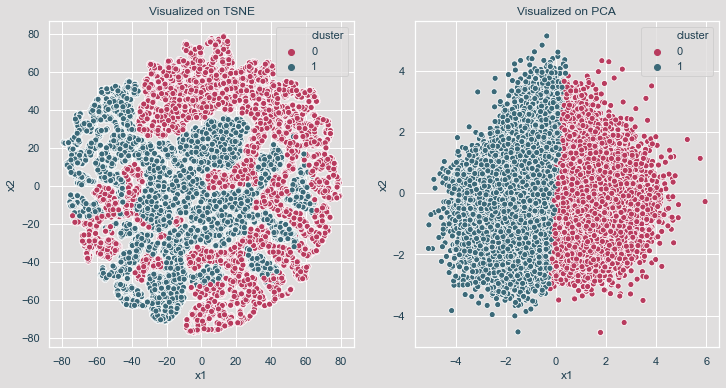

In [124]:
# sns.set()
# https://colorhunt.co/palette/206723
sns.set_style("darkgrid")
background_color = '#eeecda'
lines_color = '#f08a5d'
dots_color = ['#b83b5e', '#6a2c70']

sns.set('notebook',rc={'axes.facecolor':background_color, 'figure.facecolor':background_color, 
            'lines.color': lines_color, 'xtick.color':lines_color, 'ytick.color':lines_color,
            'axes.labelcolor':lines_color,'text.color':lines_color})
fig, ax = plt.subplots(1, 2, figsize=(12,6))
sns.scatterplot(data=PCA_df,x='x1',y='x2',hue='cluster',legend="full",alpha=1,ax=ax[1], palette=dots_color, edgecolors=None)
sns.scatterplot(data=TSNE_df,x='x1',y='x2',hue='cluster',legend="full",alpha=1,ax=ax[0], palette=dots_color, edgecolors=None)
ax[0].set_title('Visualized on TSNE')
ax[1].set_title('Visualized on PCA')

# Custom new tests
Testing with fake news generated from https://www.thefakenewsgenerator.com/

In [159]:
def prepare_news(news=None, method=sentence_vector):
    if type(news) is not list:
        news = [news]
    return np.array([method(model, preprocess_string(new, CUSTOM_FILTERS)) for new in news])

In [192]:
glob_list = glob('../news/*.txt')
news_list = [open(new, 'r', encoding='utf8').read() for new in glob_list]

kmeans.predict(prepare_news(news_list))

C:\Users\jarc1\anaconda3\envs\env1\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


array([0, 1, 1, 0, 1, 0, 1])